
##**APS 1022 Option Valuation Project (Summer 2022)**


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# **A. Summary**



Options are financial contracts that allow the contract holder to purchase or sell the asset with an agreed amount at strike price K within a predetermined period T knowns as maturity. Call option and put option are two basic types of options. A call option allows the holder to purchase but not obligatorily the underlying asset for an agreed amount at strike price K. A put options allows the owner to sell but not obligatorily the underlying asset for an agreed amount at strike price K. 

Pricing an option is a critical problem in today's financial markets. Several options pricing models, such as the Black-Scholes model, binomial model, and trinomial model, were developed to value option prices. In our research, we utilized two approaches: Monte Carlo simulation and the Binomial Lattice model, which both simulate seven different types of options: Asian call/put options, Lookback call/put options, Floating call/put options, and American options. The underlying assets' results will then be compared between two approaches. 

We begin Monte Carlo Simulation by constructing a massive number of possible future asset values and calculating the payoff of each option for all potential price paths. Finally, we take the average of all payoffs and compute the anticipated price by discounting the outcome back to today. In addition, we assume that all assets encountered do not pay dividends. The Binomial Lattice, on the other hand, values options iteratively over multiple periods. The model output follows a binomial tree, with each iteration moving upward or downward ($2^8 = 256$ paths in our project). We compute the option payoff at each node, weighting it with the corresponding risk neurtral probability, and then discounting back to the present value. 

Lastly, we discuss about the similarities and differences between the Monte Carlo simulation and the Binomial Lattice model. With a large number of scenarios, paths or nodes, the various option prices calculated using the two methods would be no significant difference, despite of different computational complexity. 


# **B. Method**

## B1. Monte Carlo Simulation

Assume the stock price follows a Geometric Brownion Motion, given by the stochastic differential equation,where $r$ is the risk-free rate, and $\sigma$ is the volatility:
$$
dS_t = rS_{t}dt+\sigma S_{t}dW_{t}
$$
note that
$$
dW_{t}=Z_{t}\sqrt {\delta t}, \quad Z_t \sim N(0,1)
$$ 
By Ito's Lemma, the following equation is used as the dynamic of the discretized simulation over a finite set of
$m + 1$ evenly-spaced dates $t_{0}, t_{1}, . . . , t_{m}, t_{0}=0,t_{m}=T$:
$$
S_{t_{j}}=S_{t_{j-1}}e^{(r-\frac{\sigma^2}{2})\delta t+\sigma\sqrt{\delta t}Z_j}, \quad Z_j \sim N(0,1), \quad j=1,\dots,m \tag{B1.1}
$$
where
$$
t_{j}=j\delta t=j\frac{T}{m} ,m=\frac{T}{\delta t}
$$
We will simulate N stock price paths over the time period $[0,T]$, denoted as $S_{t(w_{1})},S_{t(w_{2})},...,S_{t(w_{N})}$. Then the payoff of a particular option for path $i$ would be $h = h(S_{T(w_{i}})$. To obtain the expected option payoff at time T, since the simulated paths can be considered as independently and identically distributed random variables, we simply take the average of all possible payoffs over N paths, as following:
$$
E(\tilde{h}(S_{T}))=\frac{1}{N}\sum_{i=1}^{N}{\tilde{h}(S_{T(w_{i}})} \tag{B1.2}
$$
Finally, we can find the option price $h_{0}$ by discounting the expected option payoff at time $T$ (i.e. $E(\tilde{h}(S_{T})$) back to time 0 using risk-free rate, assume continuously compounding:
$$
h_{0}= e^{-rT}E(\tilde{h}(S_{T})) \tag{B1.3}
$$

An example of simulated paths for prices of a stock is shown in the following graph.

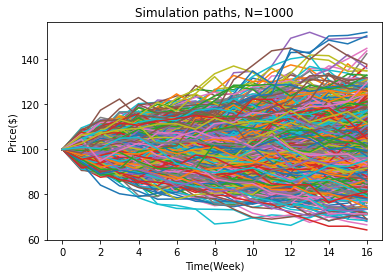

## B2. Lattice (Binomial Tree Model)



The binomial model is shown in the following figure. This model is similar to the multiplicative model where the price is multiplied by a random variable at each time step. In binomial model, the price of the next period has only two possible values, a multiple of previous period price with either factor u or factor d. The physical probability of going up is denoted as p (corresponding to u) and probability of going down is (1-p) (corresponding to d). The factor u and d are selected in a way such that the true stochasitic nature of the stock is captured. We will only discuss the price after the first step, as the remaining steps are duplicated. The matching is done by the following procedures. 

Suppose $S(0) = 1$ and v is the expected logarithmic annual return. knows as compounding annual risk free rate, and $σ$ is the voltality of the underlying stock. 
$$
E(\ln S_1) = p\ln u + (1-p)\ln d 
$$ 
$$
var(\ln S_1) = p(1-p)(\ln u - \ln d)^2 
$$
$$
 p\ln u + (1-p)\ln d  = v Δt  \tag{B2.1}
$$
$$
 p(1-p)(\ln u - \ln d)^2  = v Δt \tag{B2.2}
$$
By solve 2 equations above, we should get 
$$
 \ln u = \sqrt{σ^2Δt + (vΔt)^2} \\
 p = 1/2 + \frac{1/2}{\sqrt{σ^2/(v^2Δt)+1}}
$$
When $Δt$ is small, the derivation can be approximated to 

$$
 u = e ^{σΔt} \\
 d = e ^{-σΔt} \\
 p = 1/2 + 1/2 \frac{v}{\sigma}\sqrt{Δt}\\ \tag{B2.3}
$$ 

In the model, we assume no arbitarge opportunity, and therefore the risk neutral probability q can be derived in term of u, d, r where 
$$
q = \frac{e^{rt}-d}{u-d}  \tag{B2.4}
$$
The risk neutral probability of going up (corresponding to u) is denoted as q while the probability of going down is denoted as (1-q).

When considering multi-period, as the lattice process is a binomial process, the risk neutral probability of each end node is followed binomial distribution as well where 
$$
q(S_T = S_0 u^k d^{m-k} |S_0 = S_0) =  {m \choose k } q^k(1-q)^{m-k}
$$
Note that $n \choose k$ is the total number of paths to reach end node $S_0u^kd^{m-k}$ while each path has the risk neutral probability $q^k(1-q)^{m-k}$. In the code realization, we do not explicitly leverage this equation, but we are generating all possible paths instead of end points and obtaining the price of option at time T by multiplying payoff of each path with corresponding risk neutral probability. It is true that different paths may reach out to the same end point. Once the price of option at time T is calculated, we are able to discount the price back to the initial value with $e^{-rt}$. 


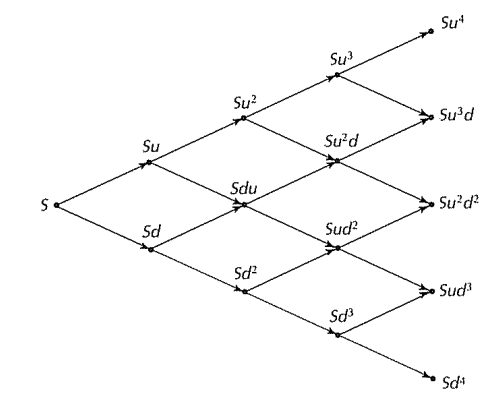

## B3. Options 


### American Option
> The American option can be exercised at any time before maturity. To estimate the exercise time, we assumed the option is exercised at $t=\tau \in \{t_{0},t_{1},...,t_{n}\}$ when the value of the payoff at $\tau$ exceed the value of the option given by the Black-Scholes model $\mathbb{E}[S_T|S_t] $:
$$
\mathbb{E}[S_T|S_t]=
\left\{\begin{matrix}
S_tN(d_1)-Ke^{-r(T-t)}N(d_2) & (call) \\
Ke^{-r(T-t)}N(-d_2)-S_tN(-d_1) &  (put)
\end{matrix}  \tag{B3.1}
\right.
$$

$$
\tau = \min \limits_{i} \left\{\begin{matrix} 
\{t_i|(S_{t_i}-K)^{+} >\mathbb{E}[S_T|S_{t_i}]  \} & (call) \\
\{t_i|(K-S_{t_i})^{+} >\mathbb{E}[S_T|S_{t_i}]  \} & (put)
\end{matrix} \tag{B3.2}
\right.
$$

### European Option
>European option is the most "basic" option. The payoff of European option is determined by the asset price at maturity only.

### Asian Option
>Asian option's payoff depends on the average underlying asset price path. This kind of option allows the buyer to purchase(or sell) the underlying asset at the average 

### Lookback Option
>Lookback option's payoff depends on the minimum or maximum asset price path. At the time of exercise, the most beneficial price of the underlying asset over life is used instead of market price at maturity. This kind of option allows the owner to exercise an option with the most profit over the life of the option. 

### Floating Lookback Option 
> In floating lookback option, market price is used to calculated the payoff. However, the strike price is set in favor of the most beneficial price. For call option, the strike price is set to be the minimum price along the path. For put option, the strike price is set to be the maximum price along the path. 


### Formula

Option Type | Payoff
--- | ---
European Call | $$(S_T-K)^+ $$
European Put | $$(K-S_T)^+ $$
Asian Call | $$(\bar{S} - K)^+$$
Asian Put | $$(K - \bar{S} )^+$$
Lookback Call | $$(S_{max} - K)^+ $$
Lookback Put | $$(K - S_{min} )^+$$
Floating Lookback Call | $$(S_T - S_{min})^+$$
Floating Lookback Put | $$(S_{max} - S_T)^+$$

where
$$
 \bar{S} = \frac{1}{m+1}∑_{j=0}^{m}{S_{t_j}} \\
 S_{max} = \max (S_{t_1}, S_{t_2}, ..., S_{t_m}) \\
 S_{min} = \min (S_{t_1}, S_{t_2}, ..., S_{t_m}) \\
$$
 <center>
 
 $ S_{T}= $  maturity stock price 

 $ S_{t_j}= $  stock price at $j^{th}$ time step
 
 $ K= $ striking price
 </center>


# **C. Code Explanation**

Let m denotes the total number of time steps.

```_monte_carlo```
1. For each path $i=1,...,N$ and for each time step $j=1,...m$, randomly generate a number from $N(0,1)$
2. Calculate $ln(S)$ using formula $B1.1$ along with np.cumsum() function to find the cumulative sum of $ln(S)$ for each time step j
3. Then calculate $S$ by $S_0e^{lnS}$; $S$ would be a matrix of simulated stock prices in shape of $N$ rows and $m+1$ columns (including $S_0$), where $S[i,j+1]$ would be the simulated stock price at time step j for path i


```_lattice```
1. Calculate ln(u), ln(d), q, by equation $B2.3$ and $B2.4$
2. Generate a binary matrix M in shape $(2^m, m+1)$, where each row specifies a possible path $r_i$ to $S_{i_m}$. If the stock moves upward at $t_j$ in path i,  $M[i,j]$ = 1. If the stock moves downward at $t_j$ in path i, M[i,j] = 0. In total, there should be $2^m$ paths to $S_T$, although some paths may reach the same end point. 
3. By matrix M, we can stimulate the logarithmic mutiple of $S_0$ at $t_j$ on path i by ultilizing np.cumsum() function, where $M_2[i,j] = ln(u^k) + ln(d^{j-k}) = kln(u) + (j-k)ln(d)$. Then perform elementary operation to the matrix $M_2$ by $S_0 e^{M_2}$ to obtain all price paths. 
4. By matrix M, we can also obtain the risk neutral probility to each path. First, sum up the number of upward movements for each path i to  obtain a vector $\hat{u}$. The number of downward movement $\hat{d}$ is $m -\hat{u} $. Then performan elementary operation to vector $\hat{d}$ and $\hat{u}$ to obtain risk neutral probabilities $\hat{q} = q^{\hat{u}}*(1-q)^{\hat{d}} $ where $*$ is the element-wise product. 


```change_self_name```

* Change the option type of the Option object

```compute_price``` 

**For American options:**

1. For every path generated, compute the payoff if execute the option at $t=\tau$  and the Black-Scholes value of the option $\mathbb{E}[S_T|S_t] $ , at each time step. $t\in \{t_{0},t_{1},...,t_{n}\}$. 
2. If we find that at some $t_j$ that the payoff exceed $\mathbb{E}[S_T|S_{j}]$, we consider that the option is executed at time $\tau= \min t_j$, record the $\min j$.
If we fail to find any $t_j$ at which the payoff exceed $\mathbb{E}[S_T|S_{j}]$, assume it is executed at maturity, $\tau=t_n$.
3. Discount the payoffs from $t=\tau$ to $t=t_0$
4. Use the probability and the discounted payoff of each path, compute the expected value of the discounted payoff as the option price.

**For non-American options:**

1. In each path, $t=\tau \in \{t_{0},t_{1},...,t_{n}\}$
Calculate the payoff of the selected option type for each path using stock price calculated above.  
2. Compute the expected payoff $E(\tilde{h}(S_{t}))$ at time t ($t=T$ for non-American options) by dot producting the option payoffs of each path with risk neutral probability of each path (i.e. $\frac{1}{N}$ for Monte Carlo method, $\hat{q}$ for Lattice method). 
3. Discount the expected payoff using risk-free rate to time 0 to obatin the present value of the payoff (also known as the price of option). $h_0 = e^{-rmΔt}E(\tilde{h}(S_{t})), \quad t=T$ for non-American options

```plot_path```

1. Plot simulation paths for stock prices using either Monte Carlo or Lattice method
2. Number of simulated paths would be N for Monte Carlo Simulation and $2^m$ for Lattice

```plot_dist```
* Plot the distribution of payoff of option. (For American options, it plots discounted payoff.)



# **Python Codes**

# Set Constant

We use the following conversion: option maturity = 2 months = 8 weeks = 8 time step units. 1 year = 52 weeks.


In [20]:
r_f = 0.02  # Annual risk free rate
S0 = 100  # Stock price at t=0
vol = 0.25  # Volatility, sigma
Sk = 105  # Striking price
dt = 1/52  # Time step unit: 1 week = 1/52 year
T = 8/52  # Maturity: 2 months = 8 weeks
N = 500  # Sample size for Monte Carlo simulation


# Option Object

In [21]:
class Option:
    def __init__(self, name, r_f, S0, Sk, vol, T, dt, N: int, gen_method='Monte Carlo'):
        self.name = name.strip().lower()  # Avoid upper-/lowercase and extra space problem
        self.r_f = r_f # Annual risk free rate
        self.S0 = S0 # Stock price at t=0
        self.Sk = Sk # Striking price
        self.vol = vol # Volatility, sigma
        self.T = T # Maturity: 2 months = 8 weeks
        self.dt = dt # Time step unit: 1 week = 1/52 year
        self.time_steps = int(self.T/self.dt) # Number of time steps
        self.N = N # Sample size for Monte Carlo simulation
        self.gen_method = gen_method.strip().lower() # Determines how we generate the path. Lattice or Monte Carlo

        if self.gen_method == 'monte carlo':
            self.stock_paths = self._monte_carlo()  # Simulated paths
            # For Monte Carlo, the probability of all paths are the same.
            self.path_probs = np.ones(N)/N
        elif self.gen_method == 'lattice':
            # All possible paths and their possibilities
            self.stock_paths, self.path_probs = self._lattice()
        else:
            raise Exception(self.gen_method +
                            ' should be \"Monte Carlo\" or \"Lattice\"!')

    def _monte_carlo(self):  # Generate the paths using Monte Carlo method
        lnST = np.cumsum(((self.r_f-1/2*self.vol**2)*dt +
                          self.vol*np.sqrt(self.dt) * np.random.normal(0, 1, (self.N, self.time_steps))), axis=1)
        ST = np.c_[np.ones(self.N), np.exp(lnST)]*self.S0
        return ST

    def _lattice(self):  # Generate the paths and their probability using lattice method
        lnu = self.vol*np.sqrt(self.dt)
        lnd = -lnu  # The log of u and d
        q = (np.exp(self.r_f*self.dt)-np.exp(lnd))/(np.exp(lnu) -
                                                    np.exp(lnd))  # Risk-neutral probability of going up
        # Define a 0-1 matrix M with 2^time_steps rows, time_steps columns.
        # The M_ij indicates in the ith path, the stock price increase(1)/decrease(0) at the jth step.
        # List all the possible paths.
        M = np.ndarray(shape=(2**self.time_steps, self.time_steps))
        for i in range(2**self.time_steps):
            # M[i] is a binary number, which equals i
            M[i, :] = np.array(
                [i >> d & 1 for d in range(self.time_steps)][-1::-1])

        # lnud cumulates the sum of logorithms of stock price movement
        lnud = np.cumsum(M*(lnu-lnd)+lnd, axis=1)
        ST = np.c_[np.ones(M.shape[0]), np.exp(lnud)]*self.S0  # stock paths
        
        # Calculate the possibility of each path
        # up_times is a vector, up_times[i] indicates the times of going up in the ith path
        up_times = np.sum(M, axis=1)
        def f(x): return (q**x)*((1-q)**(self.time_steps-x))
        return ST, f(up_times)

    def change_self_name(self, new_name: str):
        new_name = new_name.lower().strip()
        if new_name in ['american call', 'american put', 'european call', 'european put', 'asian call', 'asian put', 'lookback call', 'lookback put', 'floating lookback call', 'floating lookback put']:
            self.name = new_name
            return 1
        else:
            Exception(new_name + ' is an invalid option type!')
            return 0

    def compute_price(self, keep_dist=False):  # Keep distribution
        if self.name == 'american call':
            # Record the step of optimal stopping time(execute time step), for analysis only.
            exercise_time_step = np.ndarray(shape=self.stock_paths.shape[0])
            # Record the value of payoff at t=0
            discounted_payoff = np.ndarray(shape=self.stock_paths.shape[0])
            for i in range(self.stock_paths.shape[0]):  # For each path
                for j in range(1, self.time_steps+1):  # For each time step
                    d1 = (np.log(self.stock_paths[i, j]/self.Sk)+(self.r_f+self.vol**2/2)*(
                        self.T-j*self.dt))/self.vol*np.sqrt(self.T-j*self.dt)
                    d2 = d1 - self.vol*np.sqrt(self.T-j*self.dt)
                    BS_value = self.stock_paths[i, j]*norm.cdf(
                        d1) - self.Sk*np.exp(-self.r_f*(self.T-j*self.dt))*norm.cdf(d2)
                    payoff = np.maximum(self.stock_paths[i, j]-self.Sk, 0)
                    if payoff > BS_value:  # Check early execution condition
                        # Execute option, record which time step is this
                        exercise_time_step[i] = j
                        discounted_payoff[i] = payoff * \
                            np.exp(-self.r_f*(-j*self.dt))
                        break
                    if j == self.time_steps:  # If failed to execute before maturity
                        exercise_time_step[i] = self.time_steps
                        discounted_payoff[i] = payoff * \
                            np.exp(-self.r_f*(-j*self.dt))
            # Calculate and return option value
            if keep_dist:
                return np.dot(self.path_probs, discounted_payoff), discounted_payoff
            else:
                return np.dot(self.path_probs, discounted_payoff)
        elif self.name == 'american put':
            # Record the step of optimal stopping time(execute time step), for analysis only.
            exercise_time_step = np.ndarray(shape=self.stock_paths.shape[0])
            # Record the value of payoff at t=0
            discounted_payoff = np.ndarray(shape=self.stock_paths.shape[0])
            for i in range(self.stock_paths.shape[0]):  # For each path
                for j in range(1, self.time_steps+1):  # For each time step
                    d1 = (np.log(self.stock_paths[i, j]/self.Sk)+(self.r_f+self.vol**2/2)*(
                        self.T-j*self.dt))/self.vol*np.sqrt(self.T-j*self.dt)
                    d2 = d1 - self.vol*np.sqrt(self.T-j*self.dt)
                    BS_value = self.Sk * \
                        np.exp(-self.r_f*(self.T-j*self.dt))*norm.cdf(-d2) - \
                        self.stock_paths[i, j]*norm.cdf(-d1)
                    payoff = np.maximum(self.Sk-self.stock_paths[i, j], 0)
                    if payoff > BS_value:  # Check early execution condition
                        # Execute option, record which time step is this
                        exercise_time_step[i] = j
                        discounted_payoff[i] = payoff * \
                            np.exp(-self.r_f*(-j*self.dt))
                        break
                    if j == self.time_steps:  # If failed to execute before maturity
                        exercise_time_step[i] = self.time_steps
                        discounted_payoff[i] = payoff * \
                            np.exp(-self.r_f*(-j*self.dt))
            # Calculate and return option value
            if keep_dist:
                return np.dot(self.path_probs, discounted_payoff), discounted_payoff
            else:
                return np.dot(self.path_probs, discounted_payoff)
        # For American options, return clauses are placed within each option.
        # For all other options, return clauses are combined and listed at the end
        elif self.name == 'european call':
            payoff = np.maximum(self.stock_paths[:, -1]-self.Sk, 0)
        elif self.name == 'european put':
            payoff = np.maximum(self.Sk-self.stock_paths[:, -1], 0)
        elif self.name == 'asian call':
            payoff = np.maximum(
                (np.average(self.stock_paths, axis=1)-self.Sk), 0)
        elif self.name == 'asian put':
            payoff = np.maximum(
                self.Sk-(np.average(self.stock_paths, axis=1)), 0)
        elif self.name == 'lookback call':
            payoff = np.maximum(np.max(self.stock_paths, axis=1)-self.Sk, 0)
        elif self.name == 'lookback put':
            payoff = np.maximum(self.Sk-np.min(self.stock_paths, axis=1), 0)
        elif self.name == 'floating lookback call':
            payoff = np.maximum(
                self.stock_paths[:, -1]-np.min(self.stock_paths, axis=1), 0)
        elif self.name == 'floating lookback put':
            payoff = np.maximum(
                np.max(self.stock_paths, axis=1)-self.stock_paths[:, -1], 0)
        else:
            raise Exception(self.name + ' is an invalid option type!')

        # If true, keep the payoff distribution. By default False
        if keep_dist:
            return np.dot(self.path_probs, payoff)*np.exp(-self.r_f*self.T), payoff
        else:
            return np.dot(self.path_probs, payoff)*np.exp(-self.r_f*self.T)

    def plot_path(self):
        plt.title('Simulation paths, N='+str(self.N))
        plt.xlabel('Time(Week)')
        plt.ylabel('Price($)')
        plt.plot(self.stock_paths.T)
        # for i in range(self.N): # These two lines can be used in case the above line failed to work well
        #   plt.plot(range(self.time_steps+1),self.stock_paths[i])
        plt.show()

    def plot_dist(self):
        # discounted_payoff is a set of discounted payoff values. Plot a histogram to show distribution
        _, discounted_payoff = self.compute_price(keep_dist=True)
        plt.hist(discounted_payoff, bins=30)
        plt.title('Payoff distribution of ' +
                  self.name.title()+' option, N='+str(self.N))
        plt.xlabel('Payoff')
        plt.ylabel('Frequency')
        plt.show()


## D. Visualization of the Solutions

In [22]:
# Create two objects for all the processes in this section
MC_option_object = Option('', r_f, S0, Sk, vol, T, dt,
                          N, gen_method='Monte Carlo')
lattice_option_object = Option(
    '', r_f, S0, Sk, vol, T, dt, N, gen_method='Lattice')
option_object_list = [MC_option_object, lattice_option_object]


In [23]:
# Loop to calculate all the prices of various options
option_list = ['American', 'European',
               'Asian', 'Lookback', 'Floating lookback']
temp = 1  # Record the No.

print('%-5s%-20s%-25s%-15s' %
      ('No.', 'Path generation', 'Option type', 'Price'))  # Print header
for j in option_list:
    for k in ['call', 'put']:
        for i in option_object_list:
            i.change_self_name(new_name=j+' '+k)
            price = i.compute_price()
            print('%-5s%-20s%-25s%-15s' % (temp, i.gen_method.title(), j+' '+k, round(price,3)))
            temp += 1


No.  Path generation     Option type              Price          
1    Monte Carlo         American call            1.738          
2    Lattice             American call            1.715          
3    Monte Carlo         American put             6.129          
4    Lattice             American put             6.309          
5    Monte Carlo         European call            2.436          
6    Lattice             European call            2.163          
7    Monte Carlo         European put             6.226          
8    Lattice             European put             6.841          
9    Monte Carlo         Asian call               0.678          
10   Lattice             Asian call               0.625          
11   Monte Carlo         Asian put                4.999          
12   Lattice             Asian put                5.456          
13   Monte Carlo         Lookback call            3.415          
14   Lattice             Lookback call            3.325          
15   Monte

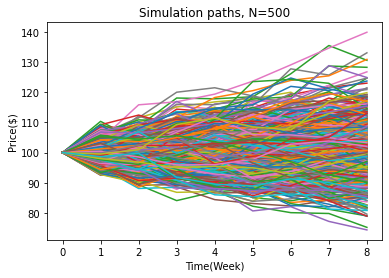

In [24]:
# plot simulation paths for stock prices using Monte Carlo Simulation
MC_option_object.plot_path()


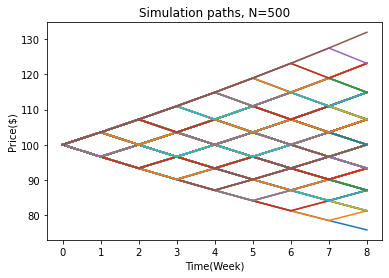

In [25]:
# plot simulation paths for stock prices using Lattice method
lattice_option_object.plot_path()


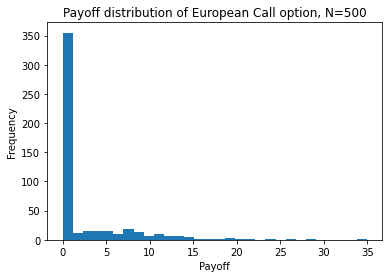

In [26]:
# Plot the distribution of (discounted) payoff using a histogram
# Use the European call option as an example. Can be observed that it is positively skewed.
MC_option_object.change_self_name('European Call')
MC_option_object.plot_dist()


## E. Comparison between Monte Carlo Simulation and Lattice

The table above shows that the two methods give similar results. However, there are some differences between the two methods. The option prices calculated based on Monte Carlo Simulation change each time we re-run the simulation, even with fixed N. This is due to the randomeness given by the random variable Z when generating each simulated path for the stock price. On the other hand, the option prices calculated based on Lattice method stay unchanged as long as $\delta t$ and $T$ are fixed. This is due to the fact that $u, d$ and $q$ are all pre-determined parameters given known risk-free rate $r$ and volitility $\sigma$. Also, Monte Carlo method is more flexible than Lattice method in terms of manipulating number of simulated paths. For Monte Carlo method, it is much easier to increase the number of paths (N) without too much computational cost. Lattice, however, is generally more computationally expensive if we wish to increase the number of paths ($2^m$), since it would require us decrease $\delta t$ in order to increase m, and the number of paths grows exponencially and restricted to be multiples of 2. In other words, if the number of time steps (m) is large (ex. 100), then the lattice method would have to generate $2^{100}=1.27\cdot 10^{30}$ paths which is computationally infeasible for a standard computer (out of memory error). But if we use Monte Carlo method instead, we could set N to be any number we require and easily compute the results.

## F. Lessons Learned

From the results for all options, we found that they are consistent for both the Monte Carlo approach and the Lattice approach. We discovered that the Monte Carlo simulation is a great method for pricing American options, because we can compute the expected return in advance as long as the log-normal distribution assumption holds. On the other hand, the lattice approach could also have a determined result if we use a fixed number of timesteps. However, the binomial lattice model scales exponentially and requires more time to compute than the Monte Carlo method does when T increases. Monte Carlo requires O(N x m) computational run time to simulate paths whereas lattice requires O($2^m$) to simulate paths in our project. Therefore, when the number of time steps (m) is large, a standard PC may not have enough computing power to fill the need through lattice approach. Further improvement on lattice approach can be done through a cleverer implementation. Considering most of paths are duplicated and determined, it turns out that we can easily compute the price and probability for each node in a closed form. The total number of distinct nodes would be m+1.

